In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.fft import fft

In [46]:
import os

# Specify the directory path
directory = 'audio-n'

# List all files in the directory
file_list = os.listdir(directory)

# Print the list of files
for filename in file_list:
    print(filename)

.ipynb_checkpoints
100..wav
100.wav
110..wav
110.wav
120..wav
120.wav
130..wav
130.wav
140..wav
140.wav
150..wav
150.wav
160..wav
160.wav
170..wav
170.wav
180..wav
180.wav
190..wav
190.wav
200..wav
200.wav
210..wav
210.wav
220..wav
220.wav
230..wav
230.wav
240..wav
240.wav
250..wav
250.wav
260..wav
260.wav
270..wav
270.wav
280..wav
280.wav
290..wav
290.wav
30..wav
30.wav
300..wav
300.wav
40..wav
40.wav
50..wav
50.wav
60..wav
60.wav
70..wav
70.wav
80..wav
80.wav
90..wav
90.wav
vv100.wav
vv101.wav
vv102.wav
vv103.wav
vv104.wav
vv105.wav
vv106.wav
vv107.wav
vv108.wav
vv109.wav
vv110.wav
vv111.wav
vv112.wav
vv55.wav
vv56.wav
vv57.wav
vv58.wav
vv59.wav
vv60.wav
vv61.wav
vv62.wav
vv63.wav
vv64.wav
vv65.wav
vv66.wav
vv67.wav
vv68.wav
vv69.wav
vv70.wav
vv71.wav
vv72.wav
vv73.wav
vv74.wav
vv75.wav
vv76.wav
vv77.wav
vv78.wav
vv79.wav
vv80.wav
vv81.wav
vv82.wav
vv83.wav
vv84.wav
vv85.wav
vv86.wav
vv87.wav
vv88.wav
vv89.wav
vv90.wav
vv91.wav
vv92.wav
vv93.wav
vv94.wav
vv95.wav
vv96.wav
vv97.wav
vv

In [47]:
import pandas as pd

# Replace 'your_excel_file.xlsx' 
excel_file_path = 'audio-n.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)
# Extract the 'Diagnosis' column
y = df['diagnosis']

# Print or use the 'Diagnosis' column as needed
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
109    1
110    1
111    1
112    1
113    1
Name: diagnosis, Length: 114, dtype: int64


In [48]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler

# Specify the directory
directory = 'audio-n'

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    # (1) Log-space array from fmin to fmax, to get nbins values
    fmin =16000 # Set fmin to 0 kHz
    fv = np.linspace(fmin, f_vector[len(f_vector) - 1], num=nbins)

    # (2) Map the previous values to the freq. values obtained from the fft
    f_vector_bin = []
    for val in fv:
        nf = f_vector[((f_vector > val))]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[len(f_vector) - 1])

    # (3) Get index of the f_values
    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)

    # (4) Get in the values of the fft in those indices. Sum values within each bin
    return fft_vector_bin, fv

# Lists to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        # Construct the full file path
        audio_file_path = os.path.join(directory, audio_file)

        # Load the audio file
        audio_signal, sr = librosa.load(audio_file_path, sr=96000)

        # Choose the number of FFT points
        n_fft = 2048

        f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft))

        # Choose the number of bins
        nbins = 20

        # Now you can use these values in your feature extraction function
        fft_feats, freq_bins = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)

        # Append features to the list
        X.append(fft_feats)

        # Print the FFT features
        #print("File:", audio_file_path)
        #print("FFT Features:", fft_feats)
        #print("=" * 30)

# Convert the list of features to a numpy array
X = np.array(X)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Now X_normalized contains your normalized feature values
print("X_normalized Shape:", X_normalized.shape)


X_normalized Shape: (114, 19)


In [49]:
from sklearn.model_selection import train_test_split

# Assuming X contains our FFT features and y contains labels
# X should be a 2D array where each row is theFFT features for one audio file
# y should be a 1D array containing the corresponding labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96000)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (91, 19)
y_train shape: (91,)
X_test shape: (23, 19)
y_test shape: (23,)


In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X_train contains our training features and y_train contains training labels

# Create SVM classifier instance with regularization
svm_classifier = SVC(C=7, class_weight='balanced', random_state=96000)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predict labels for the training set
y_train_pred = svm_classifier.predict(X_train)

# Compute the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
# Predict labels for the test set
y_test_pred = svm_classifier.predict(X_test)

# Compute the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.7362637362637363
Test Accuracy: 0.782608695652174


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, and y_test are defined from the previous code

# Build and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=3, random_state=96000)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:",train_accuracy)





Test Accuracy: 0.7391304347826086
Train Accuracy: 0.7362637362637363


In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96000)

# Build and train an XGBoost classifier with additional parameters
xgb_classifier = XGBClassifier(n_estimators=5, max_depth=1000, learning_rate=0.1, random_state=96000)
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = xgb_classifier.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Calculate train accuracy
y_train_pred = xgb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


Test Accuracy: 0.6956521739130435
Training Accuracy: 0.9120879120879121


.ipynb_checkpoints
100..wav
100.wav
110..wav
110.wav
120..wav
120.wav
130..wav
130.wav
140..wav
140.wav
150..wav
150.wav
160..wav
160.wav
170..wav
170.wav
180..wav
180.wav
190..wav
190.wav
200..wav
200.wav
210..wav
210.wav
220..wav
220.wav
230..wav
230.wav
240..wav
240.wav
250..wav
250.wav
260..wav
260.wav
270..wav
270.wav
280..wav
280.wav
290..wav
290.wav
30..wav
30.wav
300..wav
300.wav
40..wav
40.wav
50..wav
50.wav
60..wav
60.wav
70..wav
70.wav
80..wav
80.wav
90..wav
90.wav
vv100.wav
vv101.wav
vv102.wav
vv103.wav
vv104.wav
vv105.wav
vv106.wav
vv107.wav
vv108.wav
vv109.wav
vv110.wav
vv111.wav
vv112.wav
vv55.wav
vv56.wav
vv57.wav
vv58.wav
vv59.wav
vv60.wav
vv61.wav
vv62.wav
vv63.wav
vv64.wav
vv65.wav
vv66.wav
vv67.wav
vv68.wav
vv69.wav
vv70.wav
vv71.wav
vv72.wav
vv73.wav
vv74.wav
vv75.wav
vv76.wav
vv77.wav
vv78.wav
vv79.wav
vv80.wav
vv81.wav
vv82.wav
vv83.wav
vv84.wav
vv85.wav
vv86.wav
vv87.wav
vv88.wav
vv89.wav
vv90.wav
vv91.wav
vv92.wav
vv93.wav
vv94.wav
vv95.wav
vv96.wav
vv97.wav
vv

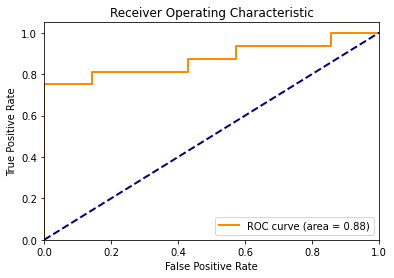

In [55]:
import os
import pandas as pd
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Specify the directory path
directory = 'audio-n'

# List all files in the directory
file_list = os.listdir(directory)
for filename in file_list:
    print(filename)

# Load labels from the Excel file
excel_file_path = 'audio-n.xlsx'
df = pd.read_excel(excel_file_path)
y = df['diagnosis']
print(y)

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    fmin = 8  # Set fmin to 8 kHz
    fv = np.linspace(fmin, f_vector[len(f_vector) - 1], num=nbins)
    f_vector_bin = []
    for val in fv:
        nf = f_vector[((f_vector > val))]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[len(f_vector) - 1])
    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)
    return fft_vector_bin, fv

# Lists to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        audio_file_path = os.path.join(directory, audio_file)
        audio_signal, sr = librosa.load(audio_file_path, sr=96000)
        n_fft = 2048
        f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft))
        nbins = 20
        fft_feats, freq_bins = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)
        X.append(fft_feats)

# Convert the list of features to a numpy array
X = np.array(X)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=96000)

# Create SVM classifier instance with regularization
svm_classifier = SVC(C=7, class_weight='balanced', random_state=96000, probability=True)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predict labels for the training set
y_train_pred = svm_classifier.predict(X_train)

# Compute the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Predict labels for the test set
y_test_pred = svm_classifier.predict(X_test)

# Compute the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Get decision scores for the test set
y_test_proba = svm_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


.ipynb_checkpoints
100..wav
100.wav
110..wav
110.wav
120..wav
120.wav
130..wav
130.wav
140..wav
140.wav
150..wav
150.wav
160..wav
160.wav
170..wav
170.wav
180..wav
180.wav
190..wav
190.wav
200..wav
200.wav
210..wav
210.wav
220..wav
220.wav
230..wav
230.wav
240..wav
240.wav
250..wav
250.wav
260..wav
260.wav
270..wav
270.wav
280..wav
280.wav
290..wav
290.wav
30..wav
30.wav
300..wav
300.wav
40..wav
40.wav
50..wav
50.wav
60..wav
60.wav
70..wav
70.wav
80..wav
80.wav
90..wav
90.wav
vv100.wav
vv101.wav
vv102.wav
vv103.wav
vv104.wav
vv105.wav
vv106.wav
vv107.wav
vv108.wav
vv109.wav
vv110.wav
vv111.wav
vv112.wav
vv55.wav
vv56.wav
vv57.wav
vv58.wav
vv59.wav
vv60.wav
vv61.wav
vv62.wav
vv63.wav
vv64.wav
vv65.wav
vv66.wav
vv67.wav
vv68.wav
vv69.wav
vv70.wav
vv71.wav
vv72.wav
vv73.wav
vv74.wav
vv75.wav
vv76.wav
vv77.wav
vv78.wav
vv79.wav
vv80.wav
vv81.wav
vv82.wav
vv83.wav
vv84.wav
vv85.wav
vv86.wav
vv87.wav
vv88.wav
vv89.wav
vv90.wav
vv91.wav
vv92.wav
vv93.wav
vv94.wav
vv95.wav
vv96.wav
vv97.wav
vv

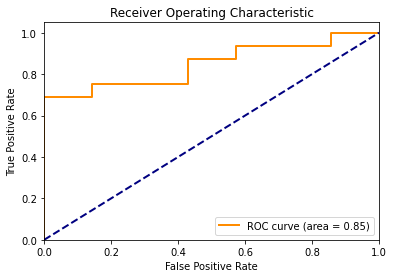

C:\Users\moham\anaconda3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


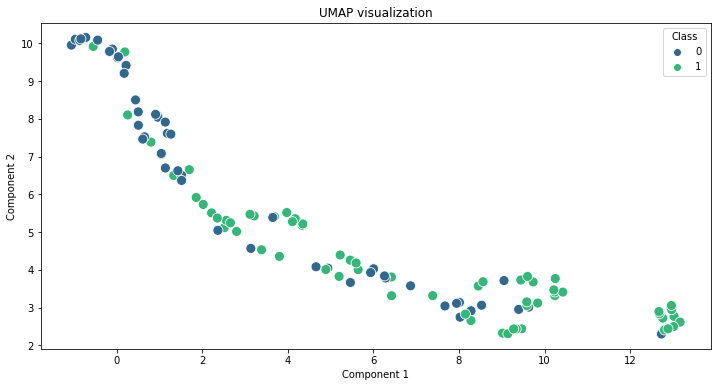

In [57]:
import os
import pandas as pd
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import umap
import seaborn as sns

# Specify the directory path
directory = 'audio-n'

# List all files in the directory
file_list = os.listdir(directory)
for filename in file_list:
    print(filename)

# Load labels from the Excel file
excel_file_path = 'audio-n.xlsx'
df = pd.read_excel(excel_file_path)
y = df['diagnosis']
print(y)

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    fmin =16000  # Set fmin to 8 kHz
    fv = np.linspace(fmin, f_vector[len(f_vector) - 1], num=nbins)
    f_vector_bin = []
    for val in fv:
        nf = f_vector[((f_vector > val))]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[len(f_vector) - 1])
    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)
    return fft_vector_bin, fv

# Lists to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        audio_file_path = os.path.join(directory, audio_file)
        audio_signal, sr = librosa.load(audio_file_path, sr=96000)
        n_fft = 2048
        f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft))
        nbins = 20
        fft_feats, freq_bins = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)
        X.append(fft_feats)

# Convert the list of features to a numpy array
X = np.array(X)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=96000)

# Create SVM classifier instance with regularization
svm_classifier = SVC(C=7, class_weight='balanced', random_state=96000, probability=True)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predict labels for the training set
y_train_pred = svm_classifier.predict(X_train)

# Compute the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Predict labels for the test set
y_test_pred = svm_classifier.predict(X_test)

# Compute the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Get decision scores for the test set
y_test_proba = svm_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Apply UMAP to reduce the dimensionality to 2D
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=96000)
X_umap = umap_model.fit_transform(X_normalized)

# Plot the UMAP results
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis', s=100)
plt.title('UMAP visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Class')
plt.show()
